# GITHUB ACTIVITY MONITOR

Here we will compare your stats to the rest of Github Switzerland. See how you compare !

In [193]:
YOUR_USERNAME = "dtsbourg"

In [194]:
SETTINGS = {
    't_test' : True
}

In [195]:
# Connecting to DB
from utils import get_mongo_db

import pickle

import numpy as np
import pandas as pd
# Import stats lib for t-test
from scipy import stats

%matplotlib inline

In [196]:
db = get_mongo_db()

Connecting to MongoDB at localhost:27017...


In [229]:
# Get user from DB
usr = db.users.find_one({ 'login' : YOUR_USERNAME })

if usr is None:
    print("[ERROR] Sorry we couldn't find you in our DB. Make you spelled your username correctly !")
else:
    print("=> Hey " + usr['name'] + " !")

=> Hey Dylan Bourgeois !


In [236]:
# Get users from DB
res = db.users.find({ 'in_ch': True, 'repositories': { '$ne': None } })

users = []

# For each user, find his repositories
for user in res:
    repos = db.repositories.find(
        { '_id': { '$in': user['repositories'] } }
    )
    
    stars = 0
    for repo in repos:
        stars = stars + repo['stargazers_count']
    
    starred = user.get('starred', [])
    following = user.get('following', [])
    followers = user.get('followers', [])
    organizations = user.get('organizations', [])
    gists = user.get('gists', [])
    repositories = user.get('repositories', [])
    
    users.append({
        '_id': user['_id'],
        'login': user['login'],
        'name': user['name'],
        'location': user['location'],
        'repositories_docs': list(repos),
        'followers' : len(followers),
        'starred' : len(starred),
        'following' : len(following),
        'orgs' : len(organizations),
        'gists' : len(gists),
        'repos' : len(repositories),
        'stars' : stars
    })
    
print("Our dataset includes {} users.".format(len(users)))

all_users = pd.DataFrame(users)

Our dataset includes 5976 users.


In [246]:
current_user = all_users.loc[all_users['_id'] == usr['_id']]
rest_of_users = all_users[all_users['_id'] != usr['_id']]


In [247]:
rest_of_users_stats = {}

## Personal metrics

### Number of repos starred

Here we will compare the number of repositories you starred compared to the rest of the swiss population.

In [248]:
mean_starred = int(rest_of_users['starred'].mean())
std_starred = rest_of_users['starred'].std()
rest_of_users_stats['starred'] = mean_starred


print("On average, swiss users of Github have starred {} repositories.".format(mean_starred))

print("You have starred {} repositories.".format(int(current_user['starred'])))

if int(current_user['starred']) > rest_of_users['starred'].mean():
    print("You have starred more repositories than the average !")
else: 
    print("You have starred less repositories than the average")
    
print(" => DELTA = {}".format(int(current_user['starred']) - mean_starred))

if SETTINGS['t_test'] is True:
    (t_statistic, p_value) = stats.ttest_1samp(rest_of_users['starred'], np.mean(current_user['starred']))
    if abs(t_statistic) > 6.31:
        print("The results is statistically significant ! (95% confidence level)")
    else:
        print("The result is not provable to be statistically significant, with a t-value = {} and p-value = {}".format(t_statistic, p_value))

On average, swiss users of Github have starred 43 repositories.
You have starred 577 repositories.
You have starred more repositories than the average !
 => DELTA = 534
The results is statistically significant ! (95% confidence level)


### Number of organisations


In [249]:
mean_orgs = rest_of_users['orgs'].mean()
std_orgs = rest_of_users['orgs'].std()
rest_of_users_stats['orgs'] = mean_orgs

print("On average, swiss users of Github are part of {} organizations (± {}).".format(mean_orgs, std_orgs))

print("You are part of {} organization(s).".format(int(current_user['orgs'])))

if int(current_user['orgs']) > mean_orgs:
    print("You are part of more organizations than the average !")
else: 
    print("You are part of less organizations than the average")
    
print(" => DELTA = {}".format(int(current_user['orgs']) - mean_orgs))

if SETTINGS['t_test'] is True:
    (t_statistic, p_value) = stats.ttest_1samp(rest_of_users['orgs'], np.mean(current_user['orgs']))
    if abs(t_statistic) > 6.31:
        print("The results is statistically significant ! (95% confidence level)")
    else:
        print("The result is not provable to be statistically significant, with a t-value = {} and p-value = {}".format(t_statistic, p_value))

On average, swiss users of Github are part of 0.4031799163179916 organizations (± 1.03080600893341).
You are part of 1 organization(s).
You are part of more organizations than the average !
 => DELTA = 0.5968200836820083
The results is statistically significant ! (95% confidence level)


### Number of gists 

In [250]:
mean_gists = rest_of_users['gists'].mean()
std_gists = rest_of_users['gists'].std()
rest_of_users_stats['gists'] = mean_gists

print("On average, swiss users of Github have created {} gists (± {}).".format(mean_gists, std_gists))

print("You have created {} gist(s).".format(int(current_user['gists'])))


if int(current_user['gists']) > mean_gists:
    print("You have created more gists than the average !")
else: 
    print("You have created less gists than the average")
    
print(" => DELTA = {}".format(int(current_user['gists']) - mean_gists))

if SETTINGS['t_test'] is True:
    (t_statistic, p_value) = stats.ttest_1samp(rest_of_users['gists'], np.mean(current_user['gists']))
    if abs(t_statistic) > 6.31:
        print("The results is statistically significant ! (95% confidence level)")
    else:
        print("The result is not provable to be statistically significant at 95% confidence, with a t-value = {} and p-value = {}".format(t_statistic, p_value))

On average, swiss users of Github have created 3.2589121338912133 gists (± 12.14863356282222).
You have created 4 gist(s).
You have created more gists than the average !
 => DELTA = 0.7410878661087867
The result is not provable to be statistically significant at 95% confidence, with a t-value = -4.715320583024203 and p-value = 2.4681299834357995e-06


### Number of repos


In [251]:
mean_repos = rest_of_users['repos'].mean()
std_repos = rest_of_users['repos'].std()
rest_of_users_stats['repos'] = mean_repos

print("On average, swiss users of Github have created {} repositories (± {}).".format(mean_repos, std_repos))

print("You have created {} repositories.".format(int(current_user['repos'])))

if int(current_user['repos']) > mean_repos:
    print("You have created more repositories than the average !")
else: 
    print("You have created less repositories than the average")
    
print(" => DELTA = {}".format(int(current_user['repos']) - mean_repos))

if SETTINGS['t_test'] is True:
    (t_statistic, p_value) = stats.ttest_1samp(rest_of_users['repos'], np.mean(current_user['repos']))
    if abs(t_statistic) > 6.31:
        print("The result is statistically significant ! (95% confidence level)")
    else:
        print("The result is not provable to be statistically significant at 95% confidence, with a t-value = {} and p-value = {}".format(t_statistic, p_value))

On average, swiss users of Github have created 16.537907949790796 repositories (± 35.619269610249766).
You have created 48 repositories.
You have created more repositories than the average !
 => DELTA = 31.462092050209204
The result is statistically significant ! (95% confidence level)


## Social metrics

### Number of followers



In [253]:
mean_followers = rest_of_users['followers'].mean()
std_followers = rest_of_users['followers'].std()
rest_of_users_stats['followers'] = mean_followers

print("On average, swiss users of Github have {} followers (± {}).".format(mean_followers, std_followers))

print("You have got {} followers.".format(int(current_user['followers'])))

if int(current_user['followers']) > mean_followers:
    print("You have more followers than the average !")
else: 
    print("You have less followers than the average.")
    
print(" => DELTA = {}".format(int(current_user['followers']) - mean_followers))

if SETTINGS['t_test'] is True:
    (t_statistic, p_value) = stats.ttest_1samp(rest_of_users['followers'], np.mean(current_user['followers']))
    if abs(t_statistic) > 6.31:
        print("The result is statistically significant ! (95% confidence level)")
    else:
        print("The result is not provable to be statistically significant at 95% confidence, with a t-value = {} and p-value = {}".format(t_statistic, p_value))

On average, swiss users of Github have 13.48234309623431 followers (± 106.37069830637287).
You have got 16 followers.
You have more followers than the average !
 => DELTA = 2.5176569037656904
The result is not provable to be statistically significant at 95% confidence, with a t-value = -1.8295466614400677 and p-value = 0.06736756827246672


### Number of stars on your repos


In [254]:
mean_stars = rest_of_users['stars'].mean()
std_stars = rest_of_users['stars'].std()
rest_of_users_stats['stars'] = mean_stars

print("On average, swiss users of Github have {} accumulated stars (± {}).".format(mean_stars, std_stars))

print("You have got {} accumulated stars.".format(int(current_user['stars'])))

if int(current_user['stars']) > mean_stars:
    print("You have more stars than the average !")
else: 
    print("You have less stars than the average.")
    
print(" => DELTA = {}".format(int(current_user['stars']) - mean_stars))

if SETTINGS['t_test'] is True:
    (t_statistic, p_value) = stats.ttest_1samp(rest_of_users['stars'], np.mean(current_user['stars']))
    if abs(t_statistic) > 6.31:
        print("The result is statistically significant ! (95% confidence level)")
    else:
        print("The result is not provable to be statistically significant at 95% confidence, with a t-value = {} and p-value = {}".format(t_statistic, p_value))

On average, swiss users of Github have 74.0528870292887 accumulated stars (± 1058.8088443844222).
You have got 10 accumulated stars.
You have less stars than the average.
 => DELTA = -64.0528870292887
The result is not provable to be statistically significant at 95% confidence, with a t-value = 4.676167979907855 and p-value = 2.9871417526811725e-06


## Graphical representation

In [261]:
user_stats = {
    'gists' : int(current_user['gists']),
    'orgs' : int(current_user['orgs']),
    'repos' : int(current_user['repos']),
    'starred' : int(current_user['starred']),
    'followers' : int(current_user['followers']),
    'stars' : int(current_user['stars'])
}
statistics = { 'rest' : rest_of_users_stats, 'user' : user_stats }

In [268]:
statistics_df = pd.DataFrame(statistics)
statistics_df

,rest,user
followers,13.482343,16
gists,3.258912,4
orgs,0.403180,1
repos,16.537908,48
starred,43.000000,577
stars,74.052887,10


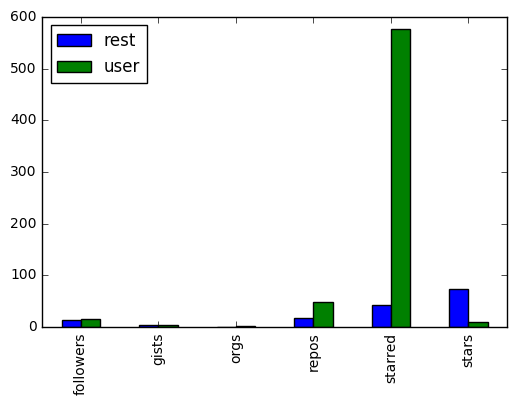

In [269]:
statistics_df.plot(kind = 'bar')